# Sean's Data Science Portfolio
### Statistics & Hypothesis Testing in Python

Welcome! In this short notebook, I will perform a quick EDA and perform a hypothesis test. This mock-data is from a short-form video company on video view, like, and share counts, banned and active users, and videos making claims v.s opinions and more. 
<br/>

**The purpose** of this portfolio piece is to demostrate a *sample* of my knowledge on the **preparation, creation, and execution of hypothesis tests** in Python.

You'll be able to see a short sample exhibiting my ability to carry out **descriptive and inferential statistics, probability distributions, and hypothesis testing** in Python.
<br/>

*This portfolio piece has three parts:*

**Part 1:** Package Importing, Loading, Quick EDA
* Loading the neccessary packages
* First Look, Checking the Means, Outliers, etc.
  
**Part 2:** Conduct the Hypothesis Test

* Formulation of Null and Alternative Hypothesis
* Execution of Hypothesis Test

**Part 3:** Insights & Takeaways

In [22]:
# Import packages for data manipulation
import numpy as np
import pandas as pd

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for statistical analysis/hypothesis testing
from scipy import stats

###  **Part 1: Data Loading**
This project uses a dataset called ``video_company_data.csv``  - it contains 19,383 rows of synthetic data representing different videos in which a claim or opinion was made.
You can find the csv for download in this repository.

In [5]:
# Load dataset into dataframe
data = pd.read_csv("Files/video_company_data.csv")

###  **Part 2: Exploratory Data Analysis & Visuals**

Here, I'll use some descriptive statistics to conduct Exploratory Data Analysis (EDA) and show that I can visualize some findings.

In [13]:
# Display the first few rows.
data.head(10)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


In [7]:
# Generate a table of descriptive statistics about the data
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [11]:
# Always a good habit to check for missing values.
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

It appears we have 298 rows with NaN elements. 

Let's drop those rows and continue.

In [47]:
# Drop rows with missing values

data.dropna()


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19079,19080,opinion,1492320297,49,in our opinion the earth holds about 11 quinti...,not verified,active,6067.0,423.0,81.0,8.0,2.0
19080,19081,opinion,9841347807,23,in our opinion the queens in ant colonies live...,not verified,active,2973.0,820.0,70.0,3.0,0.0
19081,19082,opinion,8024379946,50,in our opinion the moon is moving away from th...,not verified,active,734.0,102.0,7.0,2.0,1.0
19082,19083,opinion,7425795014,8,in our opinion lightning strikes somewhere on ...,not verified,active,3394.0,655.0,123.0,11.0,4.0


As an example of a potential exploration that could be done, I'll check out the relationship between `verified_status` and `video_like_count`. One could also check the relationship between `video_view_count` and `author_ban_status`, or any number of other combinations.
  
### For this portfolio example, we will investigate the mean of `video_like_count` for each group of `verified_status`.
In a work situation, it won't always be clear which values need to be investigated, but what will remain constant regardless of the dataset is recognizing the **Measures of Central Tendency**. 

In [67]:
# Computing the mean of `video_like_count` for each group in `verified_status`:

likes_by_ver = data.groupby('verified_status')['video_like_count'].mean()
mean_likes_by_ver = data.groupby('verified_status')['video_like_count'].mean()

likes_by_ver
mean_likes_by_ver

verified_status
not verified    87925.772422
verified        30337.633333
Name: video_like_count, dtype: float64

Here we see the mean likes of unverified videos being much higher than verified. This will be what I target for my hypothesis test.

An interesting experiment could be to check Video View Counts through a histogram:

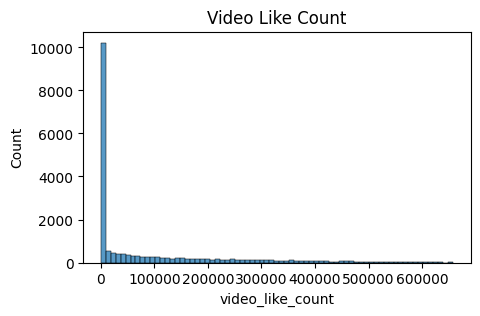

In [63]:
plt.figure(figsize=(5,3))
sns.histplot(x = data['video_like_count'], bins='auto')
plt.title('Video Like Count');

Our histogram has exposed the `video_like_count` variable to hold a **hard right skew**

Distribution of like counts > 100,000 likes generally uniform.

#### Checking the outliers...

If we begin to see a trend that identifies hard skews (and thus outliers) - I would say it's useful to drill down to identify just how many outliers exist across variables.
Doing this early helps to gain an idea of what's happening with the data.

In [30]:
count_cols = ['video_view_count',
              'video_like_count',
              'video_share_count',
              'video_download_count',
              'video_comment_count',
              ]

for column in count_cols:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    median = data[column].median()
    outlier_threshold = median + 1.5*iqr

    # Check the number of values that exceed the outlier threshold
    outlier_count = (data[column] > outlier_threshold).sum()
    print(f'Number of outliers, {column}:', outlier_count)

Number of outliers, video_view_count: 2343
Number of outliers, video_like_count: 3468
Number of outliers, video_share_count: 3732
Number of outliers, video_download_count: 3733
Number of outliers, video_comment_count: 3882


### **Part 3 - Hypothesis Testing**




#### For the purposes of this portfolio, I'll do a two sample t-test regarding `video_like_count`:

### 1.   State the null hypothesis and the alternative hypothesis:

**$H_0$**: There is **no difference** in number of likes between videos posted by verified accounts and videos posted by unverified accounts. That is to say **H0 posits that any observed difference in the sample data is due to chance or sampling variability**.

**$H_A$** : There **is** a difference in number of likes for videos posted by verified accounts and videos posted by unverified accounts. That is to say, **any observed differences in the samples is due to an actual difference in the corresponding population means and worth investigating further**..

In [57]:
# Unverified and Verified Bucketing

# Note that 'video_like_count' contains null values and requires dropna(), or else the ttest results in NaN.

sample1 = data[data["verified_status"] == "not verified"]["video_like_count"].dropna()

sample2 = data[data["verified_status"] == "verified"]["video_like_count"].dropna()

### 2.   Choose a signficance level: We will use 5% or 0.05 as our alpha value.

### 3.   Find the p-value

In [61]:
#Implementing our t-test using the aforementioned samples variables:

ttest, pvalue = stats.ttest_ind( a=sample1 , b=sample2, equal_var=False)
print(pvalue)

4.6511316028672245e-89


### 4.   Reject or Fail to Reject the **$H_0$** (Null Hypothesis)

# Our P-Value is 4.65%, just under alpha.

## Thus, in this t-test we will reject **$H_A$**. 

### In conclusion, there **is** a statistically significant difference in the mean like count between verified and unverified users. Details below.

This analysis shows that there is a statistically significant difference in the average like counts between videos from verified accounts and videos from unverified accounts, suggesting there might be fundamental behavioral differences in either the users posting the content or users engaging with the content. 

It would be interesting to investigate the root cause of these behavioral differences in both groups.

Addendum: Should this data be used for a machine-learning model, the data skew must be kept in mind. Due to this skew and the significant difference in account types, it will be key to build a logistic regression model.